In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

d:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [2]:
import pandas as pd
data = pd.read_csv('D:/College Assignment/Mega Project/FIPPS (2)/FIPPS/fips/static/model/inundation_mini.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           7 non-null      int64  
 1   Date         7 non-null      object 
 2   Rainfall     7 non-null      float64
 3   Flowrate     7 non-null      int64  
 4   Water Level  7 non-null      float64
 5   Edges        7 non-null      object 
 6   Inundation   7 non-null      object 
dtypes: float64(2), int64(2), object(3)
memory usage: 520.0+ bytes


# Converting date to datatime format

In [4]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

# Explode rows based on '\n' split in 'Edges' and 'Inundation'

In [5]:
data['Edges'] = data['Edges'].str.replace('\r', '')
data['Inundation'] = data['Inundation'].str.replace('\r', '')

In [6]:
data['Edges'] = data['Edges'].str.split('\n')
data['Inundation'] = data['Inundation'].str.split('\n')

# Update Edges and Inundation Column

In [7]:
data['Edges'] = [
    [
        list(map(float, coord.split(',')))
        for coord in row
    ]
    for row in data['Edges']
]
data['Inundation'] = [
    [
        list(map(float, coord.split(',')))
        for coord in row
    ]
    for row in data['Inundation']
]
data['Inundation']

0    [[74.5381495, 16.8536504, 0.0], [74.5383104, 1...
1    [[74.5358923, 16.8543609, 0.0], [74.5363, 16.8...
2    [[74.5328696, 16.8562611, 0.0], [74.5331163, 1...
3    [[74.5314816, 16.8534343, 0.0], [74.531613, 16...
4    [[74.5322708, 16.8533726, 0.0], [74.5321166, 1...
5    [[74.5307881, 16.8501285, 0.0], [74.5307238, 1...
6    [[74.5364959, 16.847274, 0.0], [74.5357234, 16...
Name: Inundation, dtype: object

In [8]:
data = data.drop(['Rainfall','Flowrate','Water Level'] , axis = 1)
data['Rainfall'] = np.random.uniform(0.1, 20.0, size=7)  # Random rainfall values between 0.1 and 20.0
data['Flowrate'] = np.random.randint(50, 200, size=7)  # Random flowrate values between 50 and 200
data['Water Level'] = np.random.uniform(1.0, 10.0, size=7)  # Random water level values between 1.0 and 10.0
data['Current Day Temperature'] = np.random.randint(10, 30, size=7)  # Random temperature values between 10 and 30
data['Next Day Temperature'] = np.random.randint(15, 35, size=7)  # Random next day temperature values between 15 and 35
data['Soil Quality'] = np.random.uniform(1.0, 10.0, size=7)  # Random soil quality values between 1.0 and 10.0
 
new_data = data[['Edges','Inundation']]
data = data.drop(['Edges','Inundation'] , axis = 1)
data['Edges'] = new_data['Edges']
data['Inundation'] = new_data['Inundation']
data

,Id,Date,Rainfall,Flowrate,Water Level,Current Day Temperature,Next Day Temperature,Soil Quality,Edges,Inundation
0,1,2022-08-21,9.764339,97,9.560004,18,18,7.058705,"[[74.5388676, 16.8544048, 0.0], [74.5390607, 1...","[[74.5381495, 16.8536504, 0.0], [74.5383104, 1..."
1,2,2022-08-22,10.645931,199,4.477333,13,24,9.800641,"[[74.5365695, 16.856155, 0.0], [74.5366554, 16...","[[74.5358923, 16.8543609, 0.0], [74.5363, 16.8..."
2,3,2022-08-23,13.622008,79,5.334686,29,24,7.358785,"[[74.5330716, 16.8574274, 0.0], [74.5330905, 1...","[[74.5328696, 16.8562611, 0.0], [74.5331163, 1..."
3,4,2022-08-24,8.378957,159,4.421589,20,30,3.691478,"[[74.5314627, 16.8558675, 0.0], [74.5314412, 1...","[[74.5314816, 16.8534343, 0.0], [74.531613, 16..."
4,5,2022-08-25,6.706892,60,8.631234,27,25,8.522822,"[[74.5315054, 16.853304, 0.0], [74.5315135, 16...","[[74.5322708, 16.8533726, 0.0], [74.5321166, 1..."
5,6,2022-08-26,16.123249,82,6.024505,16,15,7.096803,"[[74.5334931, 16.8470509, 0.0], [74.533654, 16...","[[74.5307881, 16.8501285, 0.0], [74.5307238, 1..."
6,7,2022-08-27,19.883922,71,9.216145,18,19,4.047486,"[[74.5342081, 16.8455016, 0.0], [74.5345085, 1...","[[74.5364959, 16.847274, 0.0], [74.5357234, 16..."


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Concatenate , Input
import tensorflow as tf

# Datasest Augmentation

In [10]:

# Duplicate the dataframe
augmented_df = data.copy()

# Temporal shifting by one day
augmented_df['Date'] = pd.to_datetime(augmented_df['Date']) + pd.DateOffset(days=1)

# Append the original and augmented dataframes
augmented_dataset = pd.concat([data, augmented_df], ignore_index=True)
for i in range(10000):
    augmented_dataset = pd.concat([data, augmented_dataset], ignore_index=True)


In [11]:
augmented_dataset.to_csv('InundationDataset.csv', index = False, encoding='utf-8') # False: not include index
print(augmented_dataset)


       Id       Date   Rainfall  Flowrate  Water Level  \
0       1 2022-08-21   9.764339        97     9.560004   
1       2 2022-08-22  10.645931       199     4.477333   
2       3 2022-08-23  13.622008        79     5.334686   
3       4 2022-08-24   8.378957       159     4.421589   
4       5 2022-08-25   6.706892        60     8.631234   
...    ..        ...        ...       ...          ...   
70009   3 2022-08-24  13.622008        79     5.334686   
70010   4 2022-08-25   8.378957       159     4.421589   
70011   5 2022-08-26   6.706892        60     8.631234   
70012   6 2022-08-27  16.123249        82     6.024505   
70013   7 2022-08-28  19.883922        71     9.216145   

       Current Day Temperature  Next Day Temperature  Soil Quality  \
0                           18                    18      7.058705   
1                           13                    24      9.800641   
2                           29                    24      7.358785   
3                      

# Data X and Y

In [12]:
 # Split the data into features (X) and target (y)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Extract features (X) and target (y)
X_spatial = augmented_dataset['Edges']  # Adjust this based on your spatial data structure
X_temporal = augmented_dataset[['Rainfall', 'Flowrate', 'Water Level' , 'Soil Quality', 'Current Day Temperature','Next Day Temperature']]
y = augmented_dataset['Inundation']

# Preprocess the data

In [13]:
# Preprocess Temporal Data
scaler_temporal = MinMaxScaler()
X_temporal = pd.DataFrame(scaler_temporal.fit_transform(X_temporal), columns=X_temporal.columns)

# Handle Missing Values
X_temporal.fillna(X_temporal.mean(), inplace=True)


In [14]:
# padding
desired_length = 100
y = [sublist[:desired_length] + [[0.0]*3] * (desired_length - len(sublist)) for sublist in y]
X_spatial = [sublist[:desired_length] + [[0.0]*3] * (desired_length - len(sublist)) for sublist in X_spatial]


# convert to numpy array

In [15]:
X_spatial  = np.array(X_spatial)
y = np.array(y)
X_temporal = np.array(X_temporal) 

In [16]:
X_temporal.shape

(70014, 6)

# Split

In [17]:
X_temporal_train = X_temporal[:65]
X_spatial_train   = X_spatial[:65]
y_train = y[:65]

X_temporal_test = X_temporal[65:]
X_spatial_test   = X_spatial[65:]
y_test = y[65:]

In [18]:
# type(X_spatial), type(X_spatial_train)

In [19]:
# type(y_test)

# Merged

In [20]:
# import numpy as np

# #result_axis_1 = np.concatenate((tensor1, tensor2.T), axis=1)
# print("\nConcatenation along axis 1:")
# print(result_axis_1)
#  Example tensors
# tensor1 = np.array([[1, 2], [3, 4]])
# tensor2 = np.array([[5, 6]])

# # Concatenate along axis 0 (rows)
# result_axis_0 = np.concatenate((tensor1, tensor2), axis=0)
# print("Concatenation along axis 0:")
# print(result_axis_0)

# # Concatenate along axis 1 (columns)


## Temporal

In [21]:
# from tensorflow.keras.layers import Input, Dense ,Reshape

# # Assuming num_temporal_features is the number of features in your temporal data
# num_temporal_features = 6

# temporal_input = Input(shape=(num_temporal_features,), name='temporal_input')
# temporal_output = Dense(units=128, activation='tanh', name='temporal_output')(temporal_input)

In [22]:
# # Reshape temporal_output to match the sequence length of spatial_output
# reshaped_temporal_output = Reshape((1, 128))(temporal_output)
# expanded_temporal_output = Concatenate(axis=1)([reshaped_temporal_output] * 100)


## Spatial

In [23]:
# Assuming num_spatial_features is the number of features in your spatial data
# num_spatial_features = 3

# Spatial data model
# spatial_input = Input(shape=(100, num_spatial_features), name='spatial_input')
# spatial_output = LSTM(units=128, return_sequences=True, name='spatial_output')(spatial_input)

## Merged

In [24]:
# Concatenate along the last axis
# merged_layer = Concatenate(axis=-1, name='merge')([expanded_temporal_output, spatial_output])

# # Output layer
# final_output = Dense(units=3, activation='linear', name='final_output')(merged_layer)


In [25]:
# Create the combined model
# combined_model = tf.keras.Model(inputs=[temporal_input, spatial_input], outputs=final_output)

In [26]:
# Compile the model
# combined_model.compile(optimizer='adam', loss='mse')
# combined_model.summary()

In [27]:
X_spatial_train.shape

(65, 100, 3)

In [28]:
from tensorflow.keras.layers import Input, Dense, Reshape, LSTM, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Assuming num_temporal_features is the number of features in your temporal data
num_temporal_features = 6

temporal_input = Input(shape=(num_temporal_features,), name='temporal_input')
temporal_output = Dense(units=128, activation='relu', name='temporal_output')(temporal_input)
reshaped_temporal_output = Reshape((1, 128))(temporal_output)
expanded_temporal_output = Concatenate(axis=1)([reshaped_temporal_output] * 100)

# Assuming num_spatial_features is the number of features in your spatial data
num_spatial_features = 3

# Spatial data model
spatial_input = Input(shape=(100, num_spatial_features), name='spatial_input')
spatial_output = LSTM(units=128, return_sequences=True, name='spatial_output')(spatial_input)

# Concatenate along the last axis
merged_layer = Concatenate(axis=-1, name='merge')([expanded_temporal_output, spatial_output])

# Additional Dense layer for better feature integration
merged_layer = Dense(units=128, activation='relu')(merged_layer)

# Output layer
final_output = Dense(units=3, activation='linear', name='final_output')(merged_layer)

# Create the combined model
combined_model = Model(inputs=[temporal_input, spatial_input], outputs=final_output)

# Use Adam optimizer with a lower learning rate
optimizer = Adam(lr=0.0001)

# Compile the model
combined_model.compile(optimizer=optimizer, loss='mse')
combined_model.summary()

# Train the combined model
combined_model.fit(
    [X_temporal_train, X_spatial_train],
    y_train,
    epochs=1000,
    batch_size=80,
    validation_split=0.2
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 temporal_input (InputLayer  [(None, 6)]                  0         []                            
 )                                                                                                
                                                                                                  
 temporal_output (Dense)     (None, 128)                  896       ['temporal_input[0][0]']      
                                                                                                  
 reshape (Reshape)           (None, 1, 128)               0         ['temporal_output[0][0]']     
                                                                                                  
 spatial_input (InputLayer)  [(None, 100, 3)]             0         []                        

1/1 [==============================] - 15s 15s/step - loss: 915.1808 - val_loss: 894.2811
Epoch 2/1000
1/1 [==============================] - 0s 380ms/step - loss: 905.5722 - val_loss: 885.3026
Epoch 3/1000
1/1 [==============================] - 0s 447ms/step - loss: 896.4332 - val_loss: 876.5306
Epoch 4/1000
1/1 [==============================] - 1s 734ms/step - loss: 887.4963 - val_loss: 867.7872
Epoch 5/1000
1/1 [==============================] - 0s 309ms/step - loss: 878.5825 - val_loss: 858.9154
Epoch 6/1000
1/1 [==============================] - 0s 268ms/step - loss: 869.5577 - val_loss: 849.6172
Epoch 7/1000
1/1 [==============================] - 0s 255ms/step - loss: 860.1180 - val_loss: 839.7614
Epoch 8/1000
1/1 [==============================] - 0s 224ms/step - loss: 850.1308 - val_loss: 829.4656
Epoch 9/1000
1/1 [==============================] - 0s 212ms/step - loss: 839.7281 - val_loss: 818.8554
Epoch 10/1000
1/1 [==============================] - 0s 455ms/step - loss: 829

In [29]:
X_temporal_train.shape

(65, 6)

# Train The Model

In [30]:
 combined_model.save('GoodModel.h5')

d:\Anaconda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
# type(X_temporal),type(X_temporal[0]),type(X_temporal[0][0]), X_temporal[0][0]

In [32]:
# type(X_spatial[0]),type(X_spatial[0][0]),type(X_spatial[0][0][0]), X_spatial[0][0]

In [33]:
# type(y),type(y[0]),type(y[0][0]),type(y[0][0][0]), y[0][0]

# Evaluation

In [34]:
# Evaluate the combined model
combined_model_loss = combined_model.evaluate([X_temporal_test, X_spatial_test], y_test)
print(f'Combined Model Loss: {combined_model_loss}')

2186/2186 [==============================] - 115s 52ms/step - loss: 6.1171
Combined Model Loss: 6.117085933685303


Epoch 1/100
1/1 [==============================] - 0s 430ms/step - loss: 6.0678 - val_loss: 6.2034
Epoch 2/100
1/1 [==============================] - 0s 278ms/step - loss: 6.7187 - val_loss: 8.1089
Epoch 3/100
1/1 [==============================] - 0s 308ms/step - loss: 8.2780 - val_loss: 9.2885
Epoch 4/100
1/1 [==============================] - 0s 354ms/step - loss: 10.0951 - val_loss: 8.8002
Epoch 5/100
1/1 [==============================] - 0s 305ms/step - loss: 9.3938 - val_loss: 6.3239
Epoch 6/100
1/1 [==============================] - 0s 217ms/step - loss: 6.3760 - val_loss: 6.6253
Epoch 7/100
1/1 [==============================] - 0s 237ms/step - loss: 7.0804 - val_loss: 10.4515
Epoch 8/100
1/1 [==============================] - 0s 284ms/step - loss: 10.5937 - val_loss: 10.2384
Epoch 9/100
1/1 [==============================] - 0s 256ms/step - loss: 11.6300 - val_loss: 7.9941
Epoch 10/100
1/1 [==============================] - 0s 230ms/step - loss: 8.4809 - val_loss: 6.3189
Epoc

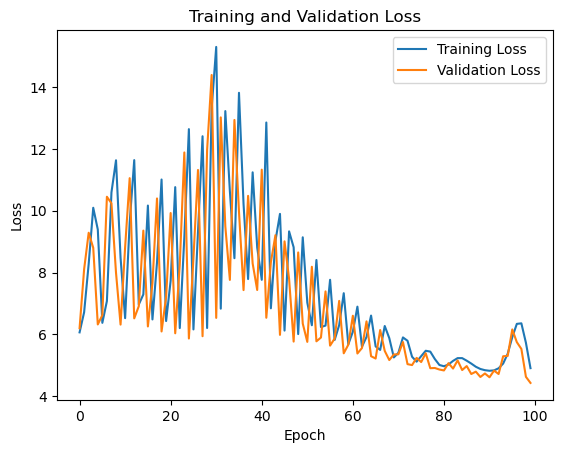

In [35]:
import matplotlib.pyplot as plt

# Assuming 'combined_model' is your trained model and 'X_temporal_train', 'X_spatial_train', 'y_train' are your training data
history = combined_model.fit(
    [X_temporal_train, X_spatial_train],
    y_train,
    epochs=100,
    batch_size=80,
    validation_split=0.2
)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction

In [36]:
# Assuming X_temporal_test and X_spatial_test are your test data
X_temporal_test = np.array(X_temporal_test)
X_spatial_test = np.array(X_spatial_test)

# Make predictions
predictions = combined_model.predict([X_temporal_test, X_spatial_test])

# Assuming predictions has the shape (number_of_samples, 100, 3)
# You can access the predicted polygon for a specific sample like predictions[i]

# Example: Accessing the predicted polygon for the first sample
predicted_polygon_sample_1 = predictions[0]

# Print or use the predicted polygon as needed
print(predicted_polygon_sample_1)


2186/2186 [==============================] - 127s 57ms/step
[[ 7.31850739e+01  1.69840279e+01 -2.59890221e-02]
 [ 7.55287781e+01  1.73159714e+01  6.50463402e-02]
 [ 7.57774124e+01  1.73143501e+01  2.44646408e-02]
 [ 7.56744995e+01  1.72504616e+01  9.94828716e-03]
 [ 7.55205765e+01  1.71825619e+01  1.26651302e-03]
 [ 7.52853394e+01  1.70897827e+01 -1.00960396e-02]
 [ 7.50620575e+01  1.70023613e+01 -2.06603669e-02]
 [ 7.49520493e+01  1.69553375e+01 -2.52122544e-02]
 [ 7.49454575e+01  1.69455528e+01 -2.41083764e-02]
 [ 7.49883881e+01  1.69541225e+01 -2.02674530e-02]
 [ 7.50475693e+01  1.69690933e+01 -1.56402253e-02]
 [ 7.51097488e+01  1.69856071e+01 -1.10606812e-02]
 [ 7.51705246e+01  1.70020218e+01 -6.81015477e-03]
 [ 7.52286148e+01  1.70178528e+01 -2.94634327e-03]
 [ 7.52838516e+01  1.70330334e+01  5.41720539e-04]
 [ 7.53363647e+01  1.70476265e+01  3.69170681e-03]
 [ 7.53864594e+01  1.70617561e+01  6.56894222e-03]
 [ 7.54345016e+01  1.70755920e+01  9.22778621e-03]
 [ 7.54809418e+01  1.7

# Draw Structure of Models

In [37]:
# from tensorflow.keras.layers import Input, Dense, LSTM
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import TensorBoard
# import datetime

# # Spatial data model
# num_spatial_features = 3
# spatial_input = Input(shape=(100, num_spatial_features), name='spatial_input')
# spatial_output = LSTM(units=128, return_sequences=True, name='spatial_output')(spatial_input)
# spatial_model = Model(inputs=spatial_input, outputs=spatial_output)

# # Temporal data model
# num_temporal_features = 3
# temporal_input = Input(shape=(num_temporal_features,), name='temporal_input')
# temporal_output = Dense(units=128, activation='tanh', name='temporal_output')(temporal_input)
# temporal_model = Model(inputs=temporal_input, outputs=temporal_output)

# # Log directory for TensorBoard
# log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# # Create TensorBoard callback
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# # Visualize the models on TensorBoard
# tensorboard_callback.set_model(spatial_model)
# tensorboard_callback.set_model(temporal_model)

# # You can start TensorBoard by running the following command in your terminal
# # tensorboard --logdir=path_to_your_logs_directory
